# Starbucks Customer Data
데이터 분석의 목적: 고객에게 프로모션 제안(offer)을 할 수 있는 더 좋은 방식은 무엇인가?


# 1. 라이브러리 호출

In [1]:
# numerical python. 수치 해석
import numpy as np

# DataFrame을 쉽게 다루기
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale = 1.2)
sns.set_palette("Set2")

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# plot을 새 윈도우 없이 노트북 상에서 바로 보기
%matplotlib inline

from scipy import stats
from scipy.stats import shapiro, skew, kurtosis, norm, chi2_contingency

# 2. 데이터 살펴보기

## 2. 1 데이터 불러오기

In [2]:
pf = pd.read_csv('../input/starbucks-customer-data/portfolio.csv')
profile = pd.read_csv('../input/starbucks-customer-data/profile.csv')
trans = pd.read_csv('../input/starbucks-customer-data/transcript.csv')

## 2.2 데이터 확인

In [3]:
pf

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


|변수명|설명|
|-----|---|
|reward|프로모 완료에 따른 보상|
|channels|프로모를 볼 수 있는 채널|
|difficulty|프로모 완료에 필요한 최소 지출|
|duration|
|offer_type|제안 유형<br/> BOGO, 할인, 정보 제공
|id|쿠폰 id|

In [4]:
print(f'Portfolio data has {pf.shape[0]} rows and {pf.shape[1]} columns\n')
pf.info()

Portfolio data has 10 rows and 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [5]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


|변수명|설명|
|-----|---|
|gender|고객 성별|
|age|고객 나이|
|id|고객 id|
|became_member_on|고객이 app id를 만든 날짜|
|income|고객의 수입|

In [6]:
print(f'Profile data has {profile.shape[0]} rows and {profile.shape[1]} columns\n')
profile.info()

Profile data has 17000 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


became_member_on은 날짜값이므로 datetime 자료형으로 수정하자.

In [7]:
# became_member_on 컬럼을 datetime 타입으로 변환
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

In [8]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [9]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        17000 non-null  int64         
 1   gender            14825 non-null  object        
 2   age               17000 non-null  int64         
 3   id                17000 non-null  object        
 4   became_member_on  17000 non-null  datetime64[ns]
 5   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 797.0+ KB


In [10]:
profile.describe()

,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,17000,14825.000000
mean,8499.500000,62.531412,2017-02-23 13:12:10.164706048,65404.991568
min,0.000000,18.000000,2013-07-29 00:00:00,30000.000000
25%,4249.750000,45.000000,2016-05-26 00:00:00,49000.000000
50%,8499.500000,58.000000,2017-08-02 00:00:00,64000.000000
75%,12749.250000,73.000000,2017-12-30 00:00:00,80000.000000
max,16999.000000,118.000000,2018-07-26 00:00:00,120000.000000
std,4907.621624,26.738580,NaN,21598.299410


In [11]:
trans

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


|변수명|설명|
|-----|---|
|person|고객 id|
|event|기록 설명<br/>transaction: 거래, offer received: 받은 제안, offer viewed: 본 제안)|
|value|(딕셔너리 자료형) 기록에 따른 제안id 또는 거래 금액|
|time|시간 (단위: 시)|

In [12]:
print(f'Trnascription data has {trans.shape[0]} rows and {trans.shape[1]} columns\n')
trans.info()

Trnascription data has 306534 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [13]:
# Unnamed: 0 컬럼 삭제
pf = pf.drop('Unnamed: 0', axis =1)
profile = profile.drop('Unnamed: 0', axis =1)
trans = trans.drop('Unnamed: 0', axis =1)

# 3. 결측치 삭제

위에서 확인한 info 정보에 의하면 p 컬럼의 gender, income 컬럼에만 결측치가 있다.

In [14]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [15]:
profile.isna().mean()

gender              0.127941
age                 0.000000
id                  0.000000
became_member_on    0.000000
income              0.127941
dtype: float64

두 컬럼 모두 약 2175개(12.8%)의 결측치를 포함한다. 이 비어있는 값들을 포함하는 행이 동일한 행인지 확인하자.

In [16]:
missing_gender = profile[profile['gender'].isna()]
missing_income = profile[profile['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

같은 행의 gender 정보와 income 정보가 누락되어있다.  
income은 고객 행동에 주요한 영향을 미칠 수 있는 지표이므로 결측치값은 삭제한다.

In [17]:
profile = profile.dropna()
profile.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

In [18]:
profile.describe()

,age,became_member_on,income
count,14825.000000,14825,14825.000000
mean,54.393524,2017-02-18 12:30:15.419898880,65404.991568
min,18.000000,2013-07-29 00:00:00,30000.000000
25%,42.000000,2016-05-20 00:00:00,49000.000000
50%,55.000000,2017-08-02 00:00:00,64000.000000
75%,66.000000,2017-12-30 00:00:00,80000.000000
max,101.000000,2018-07-26 00:00:00,120000.000000
std,17.383705,NaN,21598.299410


age 데이터의 이상치로 추정되는 최대값(118)도 제거되었다.

# 4. 중복값 확인

In [19]:
# 중복값 확인
pf[pf.duplicated()]

,reward,channels,difficulty,duration,offer_type,id


In [20]:
profile[profile.duplicated()]

,gender,age,id,became_member_on,income


In [21]:
trans[trans.duplicated()]

,person,event,value,time
66123,3dde94fa581145cb9f206624f1a94d5a,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,168
66783,e9fb6ed2cecb4980ba98c86abc9c91e3,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,168
67614,a7dc060f6fc94ca7bf71fbb188187dca,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,168
68562,30478a4c1e884a63a822aa87b833ed7a,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,168
69218,84fb57a7fe8045a8bf6236738ee73a0f,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,168
...,...,...,...,...
297625,6ba2450a438540999e633a5d99c7c7a0,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,672
299471,f39fe7ea4e5946378e6d224504b77797,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,684
304756,0785f1fce0b04ba08e01c7d2ebab4917,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,708
305551,b7e216b6472b46648272c29a52a86702,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


In [22]:
trans = trans.drop_duplicates()

# 5. 기술통계 확인

In [23]:
pf.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [24]:
variance_pf = (pf.describe().iloc[2, :] ** 2).reset_index()
variance_pf.columns = ['index', 'variance']
variance_pf

,index,variance
0,reward,12.844444
1,difficulty,34.011111
2,duration,5.388889


In [25]:
profile.describe()

,age,became_member_on,income
count,14825.000000,14825,14825.000000
mean,54.393524,2017-02-18 12:30:15.419898880,65404.991568
min,18.000000,2013-07-29 00:00:00,30000.000000
25%,42.000000,2016-05-20 00:00:00,49000.000000
50%,55.000000,2017-08-02 00:00:00,64000.000000
75%,66.000000,2017-12-30 00:00:00,80000.000000
max,101.000000,2018-07-26 00:00:00,120000.000000
std,17.383705,NaN,21598.299410


In [26]:
variance_profile = profile[['age', 'income']].var().reset_index()
variance_profile.columns = ['index', 'variance']
variance_profile

,index,variance
0,age,3.021932e+02
1,income,4.664865e+08


In [27]:
trans.describe()

,time
count,306137.000000
mean,366.185015
std,200.348174
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [28]:
variance_trans = trans['time'].var()
variance_trans

40139.39096590652

# 6. EDA

## 6.1 portfolio (pf)

In [29]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


### 6.1.1 numerical data

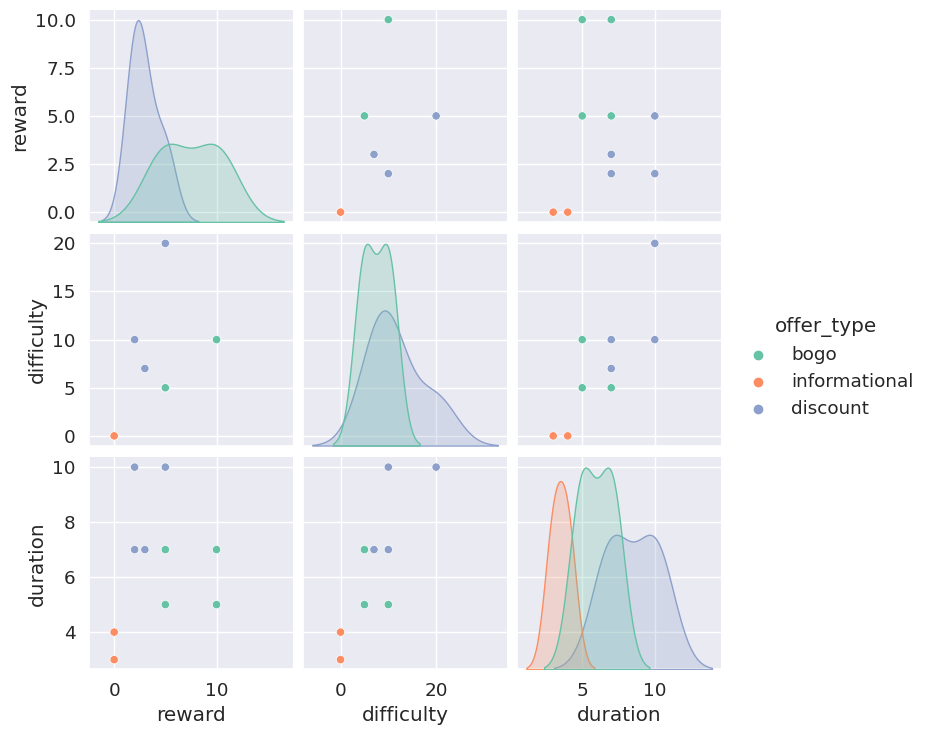

In [30]:
sns.pairplot(pf, hue = 'offer_type')
plt.show()

In [31]:
pf['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

- distount(할인) 4번, BOGO(1+1) 4번, informational 2번
- discount, BOGO, informational 순으로 duration(프로모션 지속기간)이 짧아짐.
- discount는 BOGO에 비해 difficulty는 높으나 reward가 적다.  
    = discount 프로모션에 대한 참여 조건이 더 까다로울 수 있음

#### 6.1.1.1 Pearson Correlation Coefficient

numerical data들의 상관관계를 파악할 것이다. 샘플의 수가 10개씩으로 매우 적으므로, Pearson이 아닌 Kendall 상관관계를 사용한다.

In [32]:
kendall_corr = pf[['reward', 'difficulty', 'duration']].corr(method = 'kendall')
kendall_corr

,reward,difficulty,duration
reward,1.000000,0.394874,0.184274
difficulty,0.394874,1.000000,0.702703
duration,0.184274,0.702703,1.000000


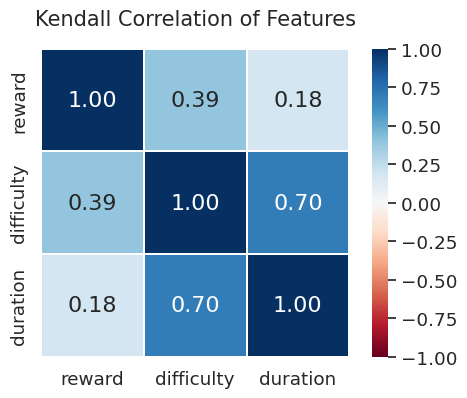

In [33]:
colormap = plt.cm.RdBu
plt.figure(figsize = (6, 4))
plt.title('Kendall Correlation of Features', y = 1.05, size = 15)
sns.heatmap(kendall_corr.astype(float), linewidths = 0.1, vmax = 1.0, vmin = -1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size': 16}, fmt = '.2f');

- difficulty와 duration은 강한 양의 상관관계를 갖는다.  
    = 프로모션을 완료하기 위한 최소 지출이 클수록 프로모션 지속 기간이 길어진다.
- difficulty와 reward는 약한 양의 상관관계를 갖는다.  
    = 지출에 비해 보상이 다소 적은 경향이 있다.
- reward와 duration은 상대적으로 매우 약한 양의 상관관계를 갖는다.  
    = 보상과 프로모션 지속 기관은 큰 연관이 없다.

### 6.1.2 categorical data

#### 6.1.2.1 Channels

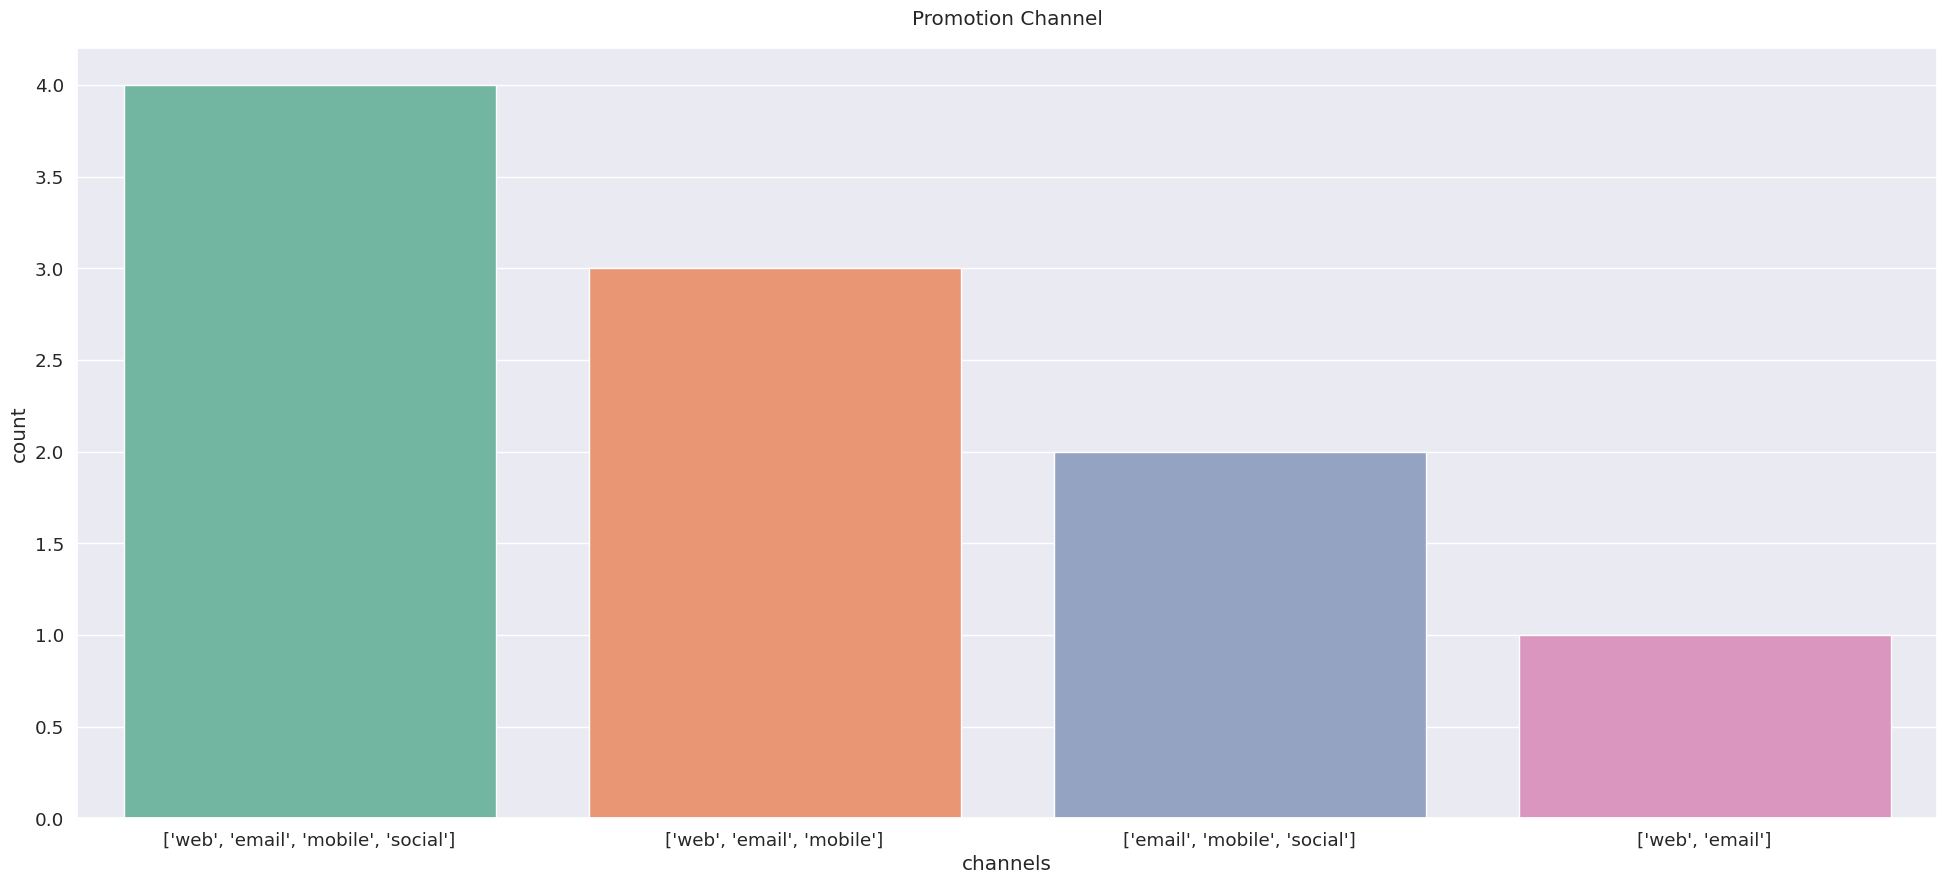

In [34]:
channel_counts = pf['channels'].value_counts(ascending = False)
order = channel_counts.index

f, ax = plt.subplots(1, 1, figsize = (24, 10))

sns.countplot(x = 'channels', data = pf, order = order, ax = ax)
ax.set_title('Promotion Channel', y = 1.02);

- 모든 채널을 사용한 4개의 프로모션 제안
- 소셜 미디어(social)를 제외한 모든 채널을 사용한 3개의 프로모션 제안  
    = 소셜 미디어의 프로모션 효과는 이러한 제안과 모든 채널을 사용하는 제안 간의 특정 형태의 비교에서 추출될 수 있음
- 웹사이트(web)을 제외한 모든 채널을 사용한 2개의 프로모션 제안  
    = 웹사이트의 프로모션 효과는 이러한 제안과 첫 번째 그룹의 비교를 통해 추출할 수 있음
- 웹사이트와 이메일 채널만 사용한 1개의 프로모션 제안  
    = 모바일 앱의 프로모션 효과는 이러한 제안과 두 번째 그룹의 비교를 통해 추출할 수 있음.  
    = 다른 비교를 통해 웹사이트의 효과를 도출할 수 있으므로, 이메일의 홍보효과도 추출할 수 있음.

## 6.2 Profile

In [35]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


In [36]:
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


### 6.2.1 Numerical data

#### 6.2.1.1 Age, Income

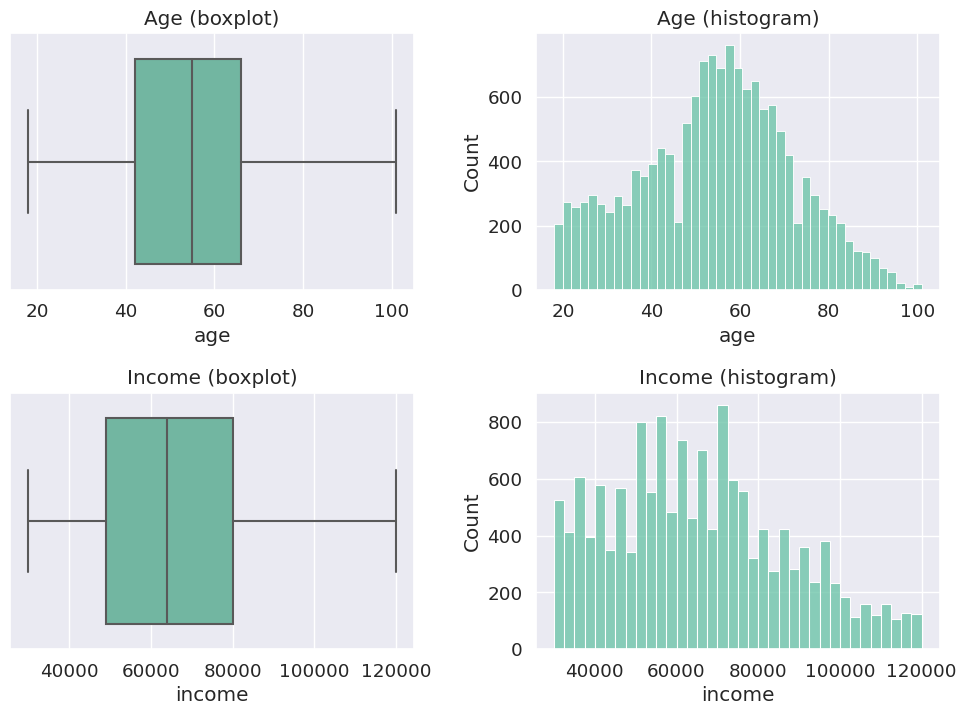

In [37]:
f, ax = plt.subplots(2, 2, figsize = (12, 8))

sns.boxplot(x='age', data=profile, ax = ax[0, 0])
ax[0, 0].set_title('Age (boxplot)');

sns.histplot(x='age', data=profile, ax = ax[0, 1])
ax[0, 1].set_title('Age (histogram)');

sns.boxplot(x='income', data=profile, ax = ax[1, 0])
ax[1, 0].set_title('Income (boxplot)');

sns.histplot(x='income', data=profile, ax = ax[1, 1])
ax[1, 1].set_title('Income (histogram)');

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)   # 그래프 사이 여백 조정

In [38]:
# 나이에 대한 정규성 검정, 왜도, 첨도 계산
normal_test_age = shapiro(profile['age'])
skewness_age = skew(profile['age'])
kurtosis_age = kurtosis(profile['age'])

# 연소득에 대한 정규성 검정, 왜도, 첨도 분석
normal_test_income = shapiro(profile['income'])
skewness_income = skew(profile['income'])
kurtosis_income = kurtosis(profile['income'])

print(normal_test_age, skewness_age, kurtosis_age)
print(normal_test_income, skewness_income, kurtosis_income)

ShapiroResult(statistic=0.9889211654663086, pvalue=3.396009938618106e-32) -0.08075782267139635 -0.5029192444943611
ShapiroResult(statistic=0.9712673425674438, pvalue=0.0) 0.4019644286452552 -0.558588846842206


__[age]__
- age의 p-value가 0에 가까우므로 age 데이터는 정규분포를 따르지 않음.
- age 데이터는 아주 약간 왼쪽으로 치우쳐져 있다.
- 정규분포에 비해 age의 분포가 더 납작함.

__[income]__
- income의 p-value가 0이므로 income 데이터도 정규분포를 따르지 않음.
- income 데이터는 약간 오른쪽으로 치우쳐져 있다.
- 정규분포에 비해 income의 분포가 더 납작함.

In [39]:
# profile 데이터셋에서 'income'에 대한 신뢰구간 계산 (t-분포 사용)
confidence_level = 0.95
alpha = 1 - confidence_level

# 표본 크기
sample_size = len(profile['income'])
sample_mean = profile['income'].mean()
sample_std = profile['income'].std()

# t-분포의 임계값 계산 (95% 신뢰구간 계산)
t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

sample_mean.round(2), margin_of_error.round(2), confidence_interval

(65404.99, 347.7, (65057.290713415394, 65752.6924231782))

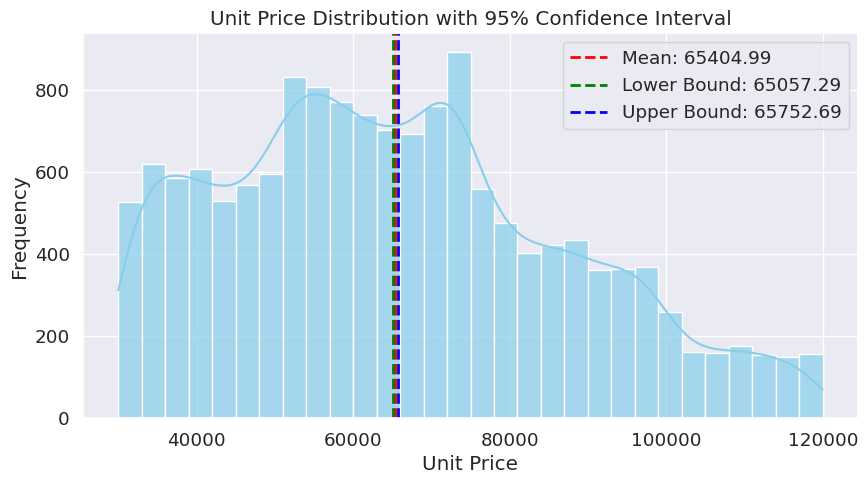

In [40]:
# 점추정 및 신뢰구간 시각화
plt.figure(figsize=(10, 5))
sns.histplot(profile['income'], bins=30, kde=True, color='skyblue', alpha=0.7)
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Unit Price Distribution with 95% Confidence Interval')
plt.legend()
plt.show()

- income의 신뢰구간은 65752.69와 65057.29 사이

#### 6.2.1.3 Age vs Income

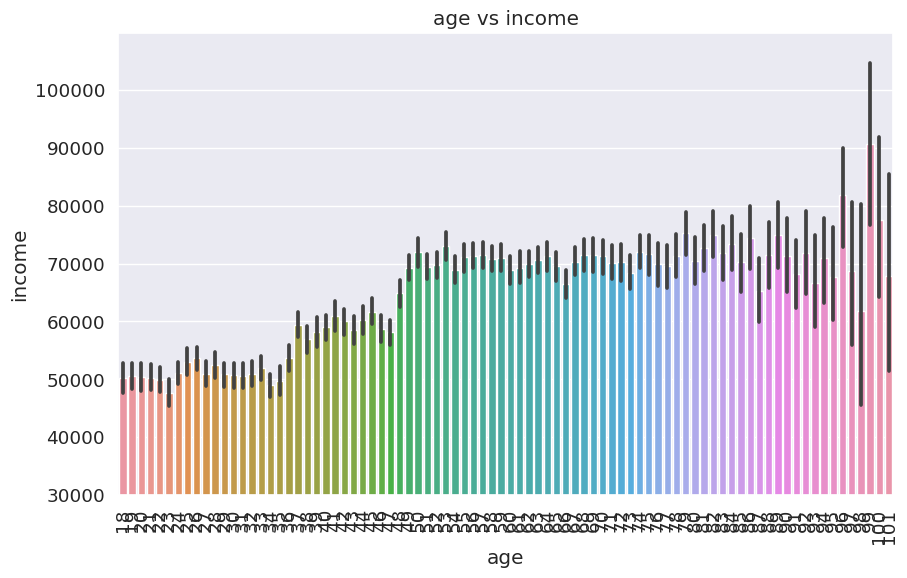

In [41]:
plt.figure(figsize = (10, 6))
sns.barplot(data = profile, x = 'age', y = 'income')
plt.title('age vs income')
plt.xlabel('age')
plt.ylabel('income')
plt.ylim(bottom = 30000)
plt.xticks(rotation = 90)
plt.show()

In [42]:
corr = profile[['income', 'age']].corr()
corr

,income,age
income,1.000000,0.306703
age,0.306703,1.000000


- age와 income은 약한 양의 상관관계가 있다.
- 🎯Feauture Engineering 포인트

### 6.2.2 Categorical data

#### 6.2.2.1 Gender

Text(0.5, 1.0, 'Gender')

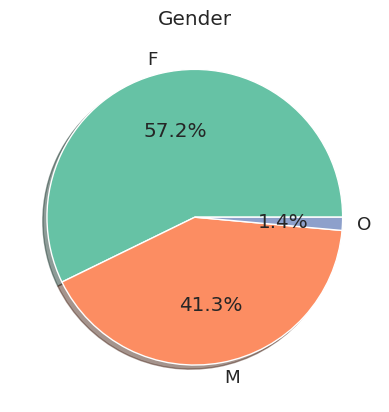

In [43]:
channel_counts = profile['gender'].value_counts(ascending = False)
order = channel_counts.index

plt.pie(x = profile['gender'].value_counts(), labels = profile['gender'].unique(), autopct = '%1.1f%%', shadow = True);
plt.title('Gender')

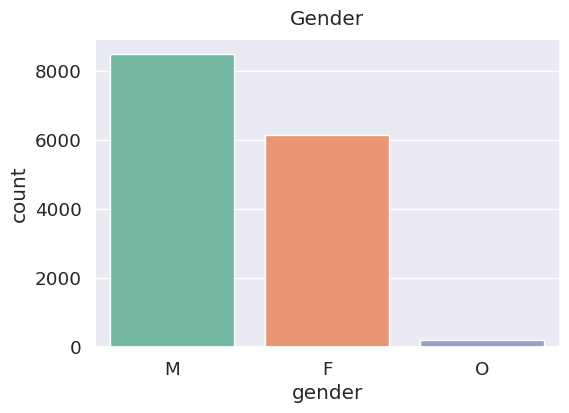

In [44]:
f, ax = plt.subplots(1, 1, figsize = (6, 4))

sns.countplot(x = 'gender', data = profile, order = order, ax = ax)
ax.set_title('Gender', y = 1.02);

남성 고객의 수가 여성 고객의 수보다 많다.

#### 6.2.2.2 became_member_on

In [45]:
# 날짜 데이터 분리하기
profile['year'] = profile['became_member_on'].dt.year
profile['month'] = profile['became_member_on'].dt.month
profile['day'] = profile['became_member_on'].dt.day
profile['day_name'] = profile['became_member_on'].dt.day_name()

profile[['year', 'month', 'day', 'day_name']].head()

,year,month,day,day_name
1,2017,7,15,Saturday
3,2017,5,9,Tuesday
5,2018,4,26,Thursday
8,2018,2,9,Friday
12,2017,11,11,Saturday


In [46]:
profile[['year', 'month', 'day']].describe()

,year,month,day
count,14825.000000,14825.000000,14825.000000
mean,2016.620169,6.695582,15.904013
std,1.198245,3.488853,8.747571
min,2013.000000,1.000000,1.000000
25%,2016.000000,4.000000,8.000000
50%,2017.000000,7.000000,16.000000
75%,2017.000000,10.000000,23.000000
max,2018.000000,12.000000,31.000000


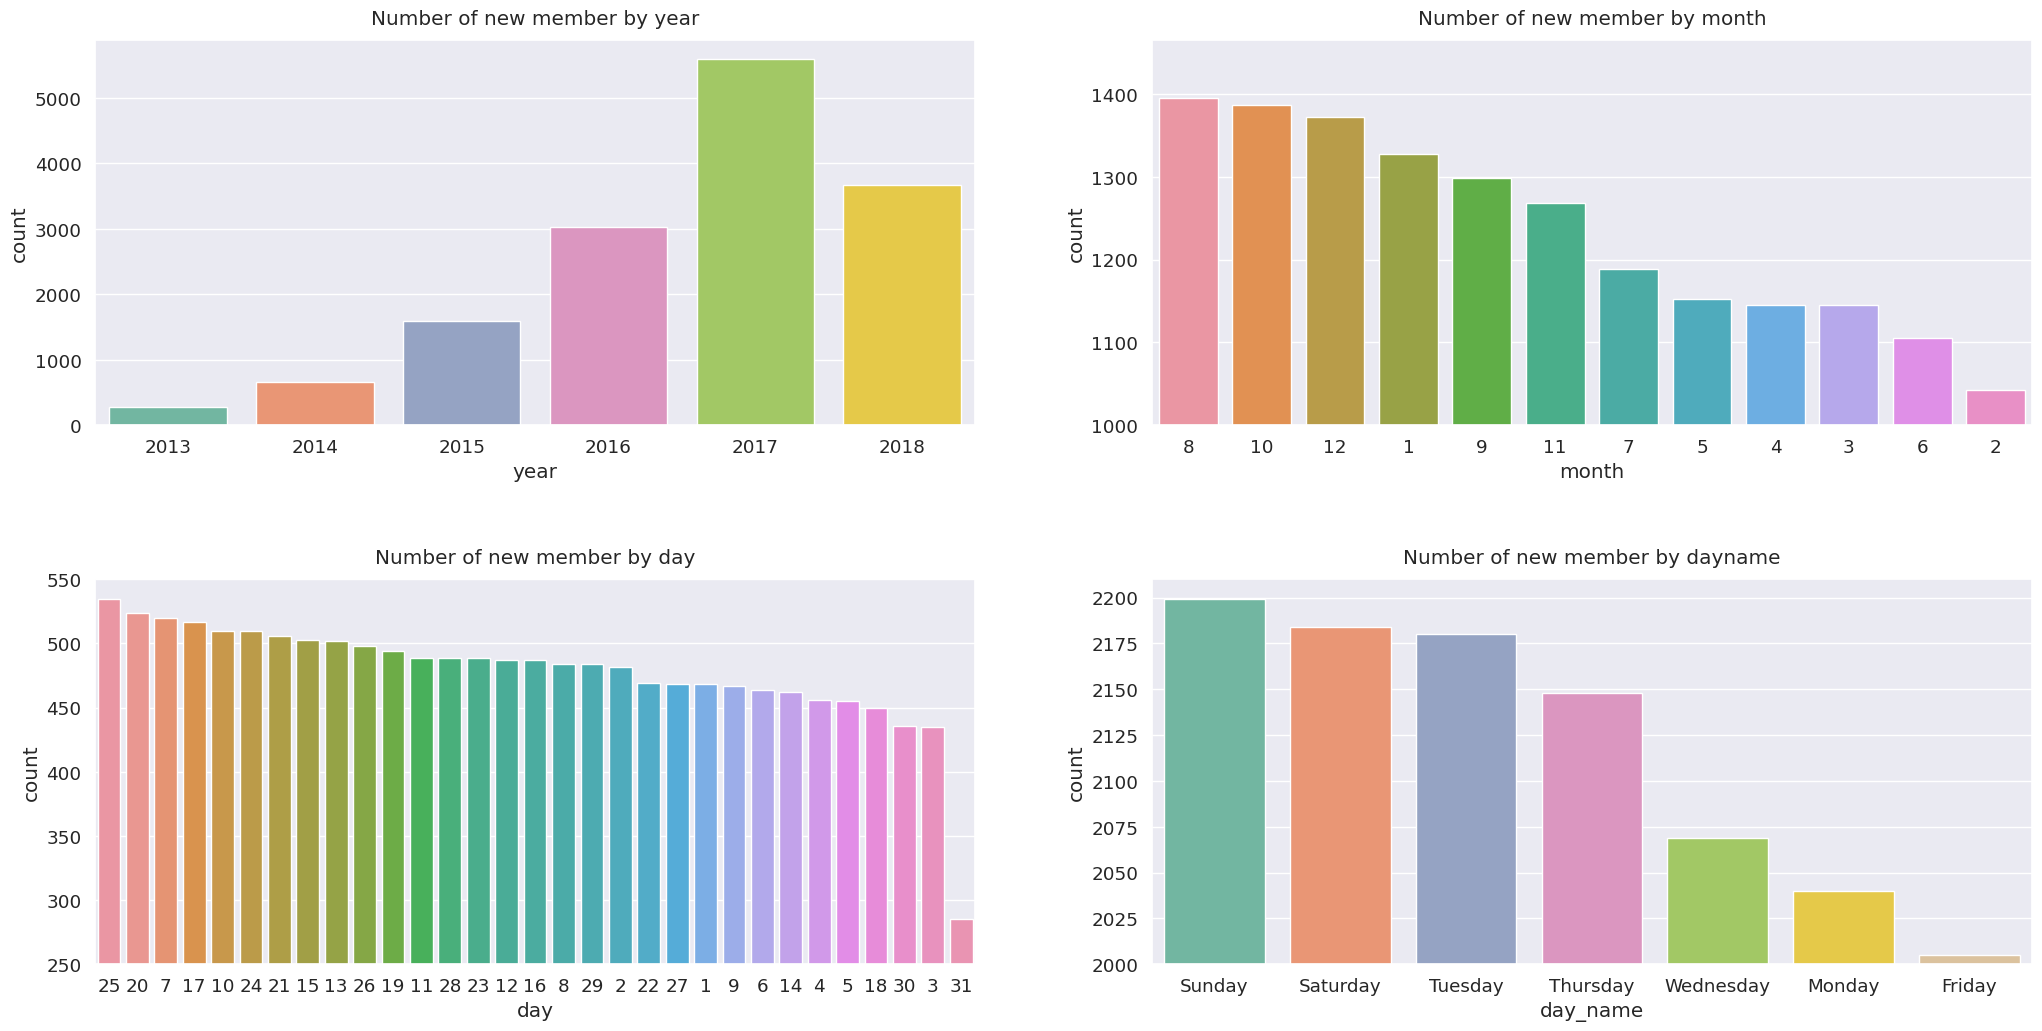

In [47]:
f, ax = plt.subplots(2, 2, figsize = (25, 12))
sns.countplot(x = 'year', data = profile, ax = ax[0,0])
ax[0,0].set_title('Number of new member by year', y = 1.02);



month_counts = profile['month'].value_counts(ascending = False)
m_order = month_counts.index

sns.countplot(x = 'month', data = profile, order = m_order, ax = ax[0,1])
ax[0,1].set_title('Number of new member by month', y = 1.02)
ax[0,1].set_ylim(bottom = 1000);



day_counts = profile['day'].value_counts(ascending = False)
d_order = day_counts.index

sns.countplot(x = 'day', data = profile, order = d_order, ax = ax[1,0])
ax[1,0].set_title('Number of new member by day', y = 1.02)
ax[1,0].set_ylim(bottom = 250, top = 550)


dayname_counts = profile['day_name'].value_counts(ascending = False)
dn_order = dayname_counts.index

sns.countplot(x = 'day_name', data = profile, order = dn_order, ax = ax[1,1])
ax[1,1].set_title('Number of new member by dayname', y = 1.02)
ax[1,1].set_ylim(bottom = 2000, top = 2210)

plt.subplots_adjust(hspace=0.4, wspace=0.2)

- 2015년부터 신규 회원이 급증하여 2017년에 가장 많이 가입함  
    = 2015년~2017년 고객 유치를 위한 캠페인을 시행했을 것
- 2018년부터 신규 회원 가입자 수 하락  
    = 2018년에 시작한 캠페인이 부정적인 영향을 미쳤을 수 있음
- 대부분 8월과 10월, 12월에 신규 가입하는 경우가 가장 많았고, 2월 가입자수가 가장 적음.
- 주말 신규 가입자수가 평일 신규 가입자수보다 많음. 주중에는 화요일 가입자가 가장 많고 금요일 가입자가 가장 적음.

#### 6.2.2.3 gender vs. income, gender vs. age

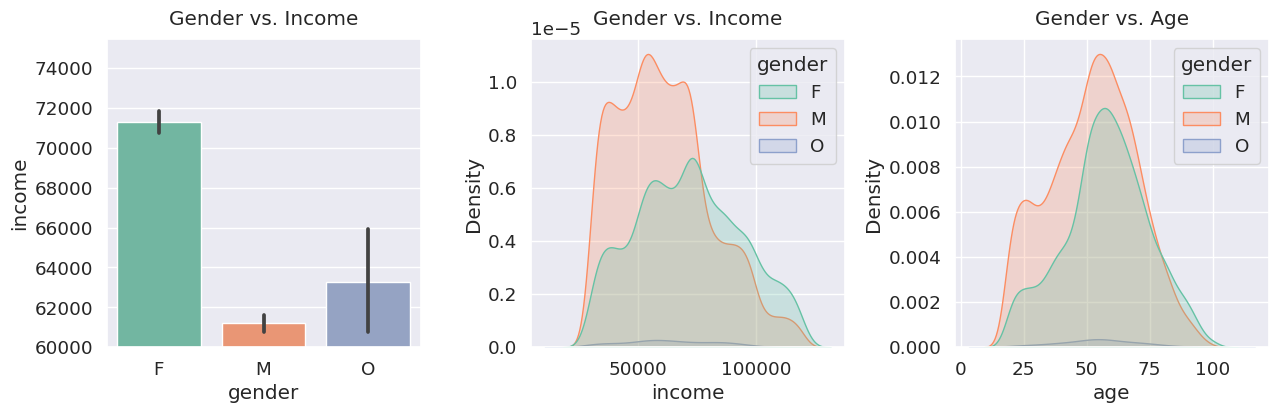

In [48]:
f, ax = plt.subplots(1, 3, figsize = (15, 4))

# gender vs. income
sns.barplot(x = 'gender', y = 'income', data = profile, ax = ax[0])
ax[0].set_title('Gender vs. Income', y = 1.02)
ax[0].set_ylim(bottom = 60000)
sns.kdeplot(x = 'income', hue = 'gender', data = profile, fill = True, ax = ax[1])
ax[1].set_title('Gender vs. Income', y = 1.02)

# gender vs. age
sns.kdeplot(x = 'age', hue = 'gender', data = profile, fill = True, ax = ax[2])
ax[2].set_title('Gender vs. Age', y = 1.02)

plt.subplots_adjust(wspace = 0.35)

- 남성의 소득수준이 가장 높으며, 여성의 소득수준이 가장 낮음
- 여성 고객의 소득은 (거의) 정규분포 형태를 나타냄  
    = 전 소득대의 여성들이 스타벅스를 이용함.
- 남성 고객의 소득은 왼쪽으로 치우쳐 있음.  
    = 소득수준이 상대적으로 낮은 남성들이 스타벅스를 더 많이 이용함.

- 여성 고객수는 (거의) 정규 분포를 따름
- 여성에 비해 젊은 남성 고객 비율이 더 높음

#### 6.2.2.4 gender vs became_member_on

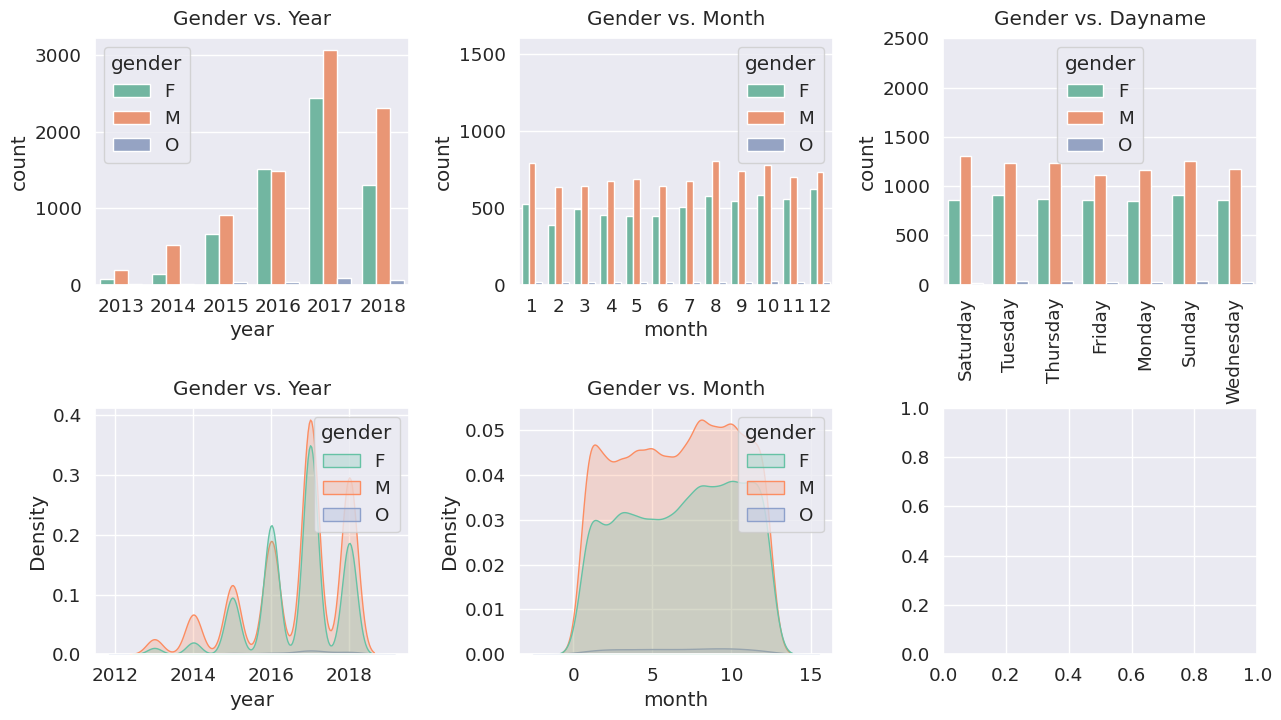

In [49]:
f, ax = plt.subplots(2, 3, figsize = (15, 8))

# gender vs. year
sns.countplot(x = 'year', hue = 'gender', data = profile, ax = ax[0,0])
ax[0,0].set_title('Gender vs. Year', y = 1.02)

# gender vs. month
sns.countplot(x = 'month', hue = 'gender', data = profile, ax = ax[0,1])
ax[0,1].set_title('Gender vs. Month', y = 1.02)
ax[0,1].set_ylim(top = 1600)

# gender vs. day_name
sns.countplot(x = 'day_name', hue = 'gender', data = profile, fill = True, ax = ax[0,2])
ax[0,2].set_title('Gender vs. Dayname', y = 1.02)
ax[0,2].set_ylim(top = 2500)
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

# gender vs. year
sns.kdeplot(x = 'year', hue = 'gender', data = profile, fill = True, ax = ax[1,0])
ax[1,0].set_title('Gender vs. Year', y = 1.02)

# gender vs. month
sns.kdeplot(x = 'month', hue = 'gender', data = profile, fill = True, ax = ax[1,1])
ax[1,1].set_title('Gender vs. Month', y = 1.02)


plt.subplots_adjust(wspace = 0.35, hspace = 0.5)

- 남녀 모두 2017년 신규 가입자수가 가장 많으나, 이후 여자는 2016년 신규가입자수가 다음으로 많은 반면 남자는 2018년 신규 가입자수가 다음으로 많다.  
    = 2018년 마케팅 캠페인 내용이 남성에 비해 여성이 비선호하는 내용이었을 가능성이 높음. 
- 2016년을 제외하고 일반적으로 남성 신규 가입율이 여성 신규 가입율보다 높음.
- 모든 월에 대해 남성 신규 가입율이 여성 신규 가입율보다 높음.

## 6.3 transcript

In [50]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306137 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306137 non-null  object
 1   event   306137 non-null  object
 2   value   306137 non-null  object
 3   time    306137 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 11.7+ MB


In [51]:
trans.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


### 6.3.1 Numerical data

#### 6.3.1.1 time

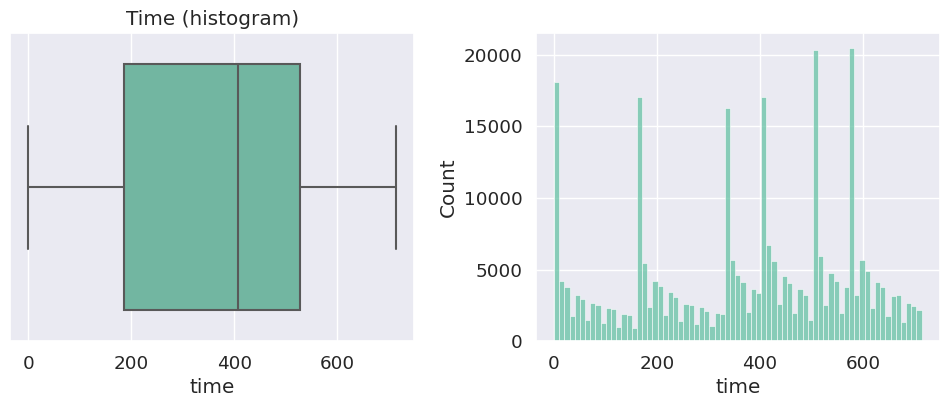

In [52]:
f, ax = plt.subplots(1, 2, figsize = (12, 4))

sns.boxplot(x='time', data=trans, ax = ax[0])
ax[0].set_title('Time (boxplot)');

sns.histplot(x='time', data=trans, ax = ax[1])
ax[0].set_title('Time (histogram)');

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)   # 그래프 사이 여백 조정

In [53]:
trans['time'].value_counts(ascending = False).head(10)

time
408    17021
576    16992
504    16804
336    16301
168    16145
0      15561
414     3569
510     3500
582     3476
588     3212
Name: count, dtype: int64

- time 변수가 특정 패턴(0, 168, 336, 408, 504, 576)을 가지고 있음.

### 6.3.2 Categorical Data 

In [54]:
trans.describe(include = 'O')

,person,event,value
count,306137,306137,306137
unique,17000,4,5121
top,94de646f7b6041228ca7dec82adb97d2,transaction,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
freq,51,138953,14983


#### 6.3.2.1 event

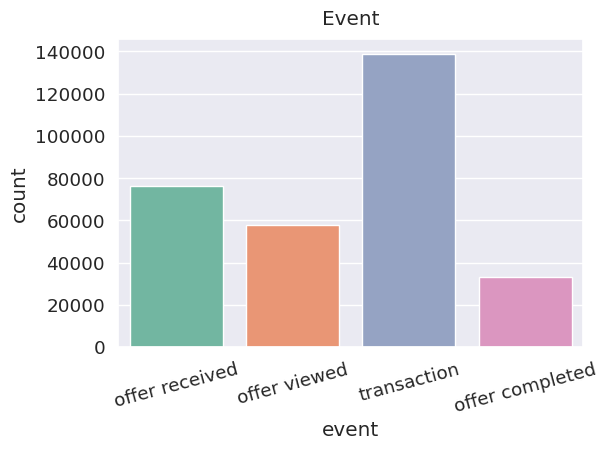

In [55]:
f, ax = plt.subplots(1, 1, figsize = (6, 4))
sns.countplot(x = 'event', data = trans, ax = ax)
ax.set_title('Event', y = 1.02)
plt.xticks(rotation = 15);

In [56]:
events = trans['event'].value_counts().reset_index()
events

,event,count
0,transaction,138953
1,offer received,76277
2,offer viewed,57725
3,offer completed,33182


In [57]:
print('조회율:', round(57725/76277 * 100, 1))
print('이행률:', round(33182/76277 * 100, 1))
print('조회 대비 이행률:', round(33182/57725 * 100, 1))

조회율: 75.7
이행률: 43.5
조회 대비 이행률: 57.5


- 약 14만건에 가까운 거래 기록
- 대부분의 고객이 프로모션 이벤트 없이도 여러번 거래했음.
- 약 76%의 고객이 프로모션 제안을 확인했고, 끝까지 이행한 고객은 약 44%임.  
    = 프로모션 제안을 많이 클릭함.
    = 프로모션 제안 조회 대비 이행률은 약 58%로, 제안을 완료한 고객 비율이 과반임. 우수한 고객 충성도 (단골).

### 6.3.3 Numerical vs. categorical data

#### 6.3.3.1 event vs time

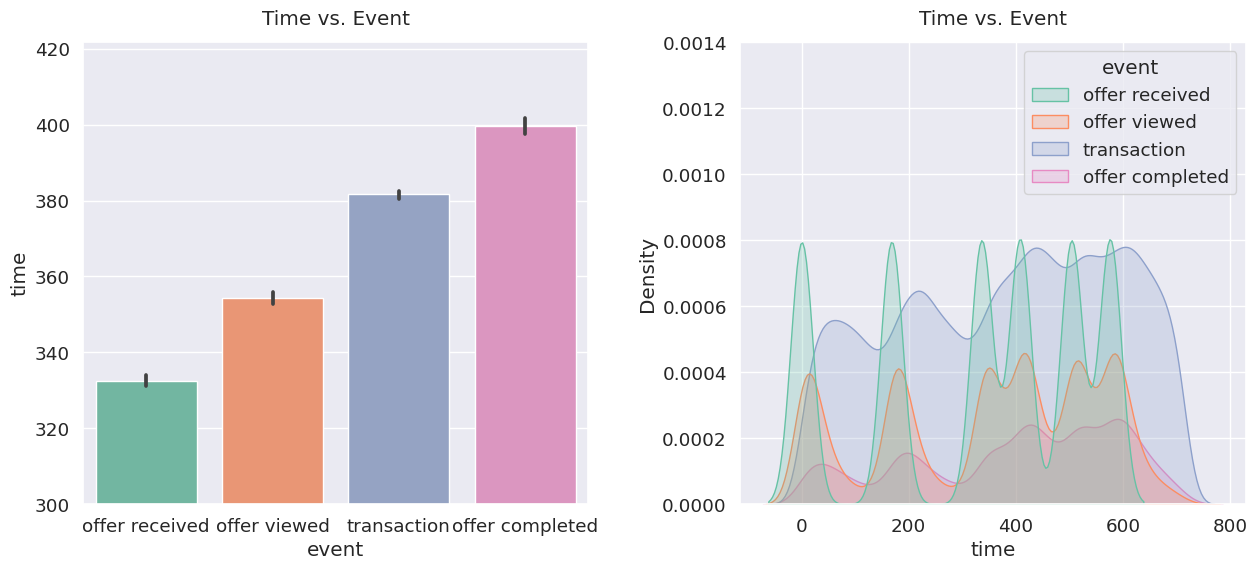

In [58]:
f, ax = plt.subplots(1, 2, figsize = (15, 6))

# event vs. time
sns.barplot(x = 'event', y = 'time', data = trans, ax = ax[0])
ax[0].set_title('Time vs. Event', y = 1.02)
ax[0].set_ylim(bottom = 300)

sns.kdeplot(x = 'time', hue = 'event', data = trans, fill = True, ax = ax[1])
ax[1].set_title('Time vs. Event', y = 1.02)
ax[1].set_ylim(top = 0.0014)

plt.subplots_adjust(wspace = 0.3)

- time은 프로모션 캠페인 시작 이후 경과된 시간을 나타낸다고 해석할 수 있음.
- 프로모션 제안은 빠르게 이루어지고 주기적으로 이루어지며, 시간이 길어짐에 따라 더 자주 제안하는 경향이 있음.
- 프로모션 제안 후 프로모션 제안을 확인하고, 거래한 뒤, 제안을 완료하는 데까지 순차적으로 시간이 소요됨.
- transaction과 offer completed는 프로모션 중후반에 더 높은 피크를 보이는데, 이는 프로모션 제안을 수행하는 사람들이 캠페인 중후반부에 몰리기 때문일 수 있음.

- 이상치에서 따로 처리해줄 만한 것이 보이지 않는데, 이는 결측치를 삭제하면서 이상치가 처리된 것으로 보임...

# 7. Feature Engineering

## 7.1 나이 구간별 분류

In [59]:
# 나이 구간 분류 함수
def categorize_age(age):
    if age <= 24:
        return '~24'
    elif age <= 34:
        return '25~34'
    elif age <= 44:
        return '35~44'
    elif age <= 54:
        return '45~54'
    elif age <= 64:
        return '54~64'
    else:
        return '64~'

# 새로운 컬럼 추가
profile['age_category'] = profile['age'].apply(categorize_age)
profile['age_category'].value_counts()

age_category
64~      4266
54~64    3421
45~54    3013
35~44    1869
25~34    1380
~24       876
Name: count, dtype: int64

## 7.2 소득 구간별 분류

In [60]:
# 소득 구간 분류 함수
def categorize_income(income):
    if income <= 30000:
        return 'Low Income'
    elif income <= 60000:
        return 'Middle Income'
    elif income <= 90000:
        return 'Upper Middle Income'
    else:
        return 'High Income'

# 새로운 열 추가
profile['income_category'] = profile['income'].apply(categorize_income)
profile['income_category'].value_counts()

income_category
Middle Income          6605
Upper Middle Income    5938
High Income            2194
Low Income               88
Name: count, dtype: int64

## 7.3 재시각화

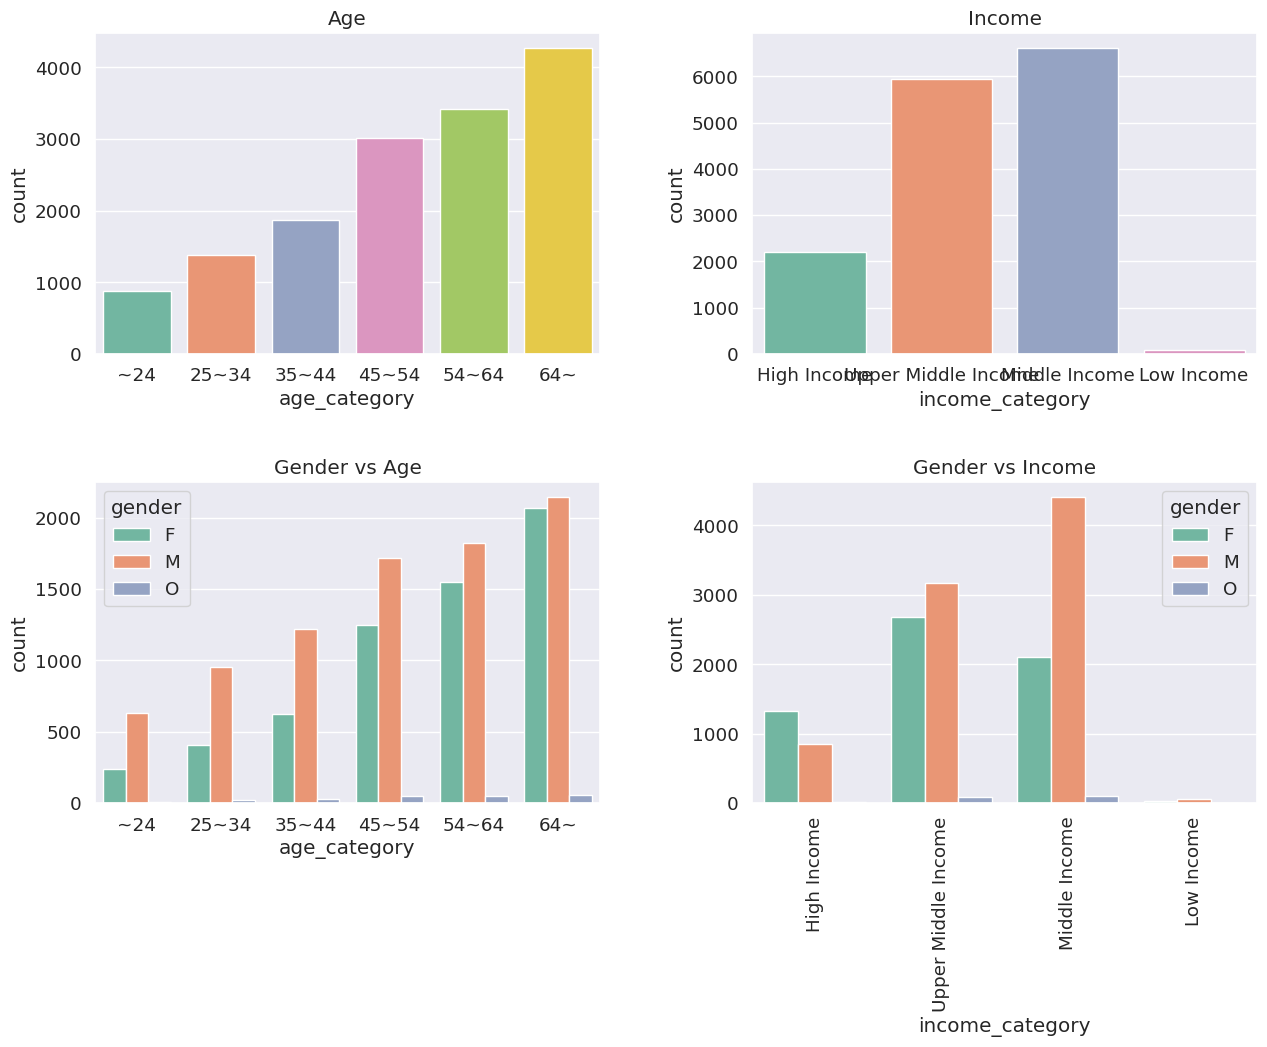

In [61]:
f, ax = plt.subplots(2, 2, figsize = (15, 10))

age_cate_counts = profile['age_category'].value_counts(ascending = True)
a_c_order = age_cate_counts.index

sns.countplot(x='age_category', data=profile, order = a_c_order, ax = ax[0,0])
ax[0,0].set_title('Age')

sns.countplot(x='income_category', data=profile, ax = ax[0,1])
ax[0,1].set_title('Income')
plt.xticks(rotation = 90)

sns.countplot(x='age_category', data=profile, hue = 'gender', order = a_c_order, ax = ax[1,0])
ax[1,0].set_title('Gender vs Age')

sns.countplot(x='income_category', data=profile, hue = 'gender', ax = ax[1,1])
ax[1,1].set_title('Gender vs Income')
plt.xticks(rotation = 90)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)   # 그래프 사이 여백 조정

In [62]:
cond = profile['gender'] == 'O'
test = profile[cond]
test['age_category'].value_counts()

age_category
64~      57
54~64    51
45~54    48
35~44    29
25~34    18
~24       9
Name: count, dtype: int64

In [63]:
testt = profile['income_category'].value_counts().reset_index()
testt
(88/testt.iloc[:, 1].sum()*100).round(2)

0.59

- 연령대가 높아질수록 스타벅스를 더 많이 이용한다.
- 성별별로도 연령대가 높아질수록 스타벅스를 더 많이 이용한다.
- 상위중간소득(upper middle income), 중간소득(middle income), 고소득(high income), 저소득(low income) 순으로 스타벅스를 이용한다. 저소득층은 전체 비율의 0.59%이다.
- 여성은 상위중간소득자가 가장 많고, 남성은 중간소득자가 가장 많다. (kde 데이터에서 확인한 것과 일치)

Text(0.5, 1.0, 'Age')

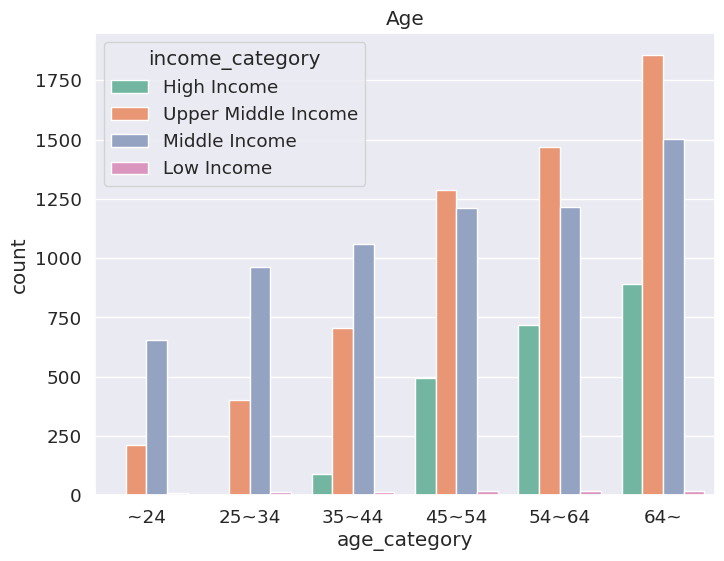

In [64]:
f, ax = plt.subplots(1, 1, figsize = (8, 6))

sns.countplot(x='age_category', hue = 'income_category', order = a_c_order, data=profile, ax = ax)
ax.set_title('Age')

In [65]:
cond = profile['income_category'] == 'Middle Income'
testtt = profile[cond]

testtt['age_category'].value_counts()

age_category
64~      1503
54~64    1214
45~54    1212
35~44    1059
25~34     964
~24       653
Name: count, dtype: int64

In [66]:
cond = profile['income_category'] == 'Low Income'
testttt = profile[cond]

testttt['age_category'].value_counts()

age_category
64~      18
45~54    16
54~64    16
25~34    15
35~44    14
~24       9
Name: count, dtype: int64

- 모든 연령대에 대해 모든 소득구간 내 이용자 수는 순차적으로 증가한다.

# 8. 가설 검정
- __귀무가설(H0)__: 소득 구간별로 제안 유형(할인, 보너스 등)에 대한 선호도에 차이가 없다.
- __대립가설(H1)__: 소득 구간별로 제안 유형에 대한 선호도에 차이가 있다.

In [67]:
# portfolio 데이터셋에서 제안 유형 확인
offer_types = pf[['id', 'offer_type']]
offer_types.head()

,id,offer_type
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo
2,3f207df678b143eea3cee63160fa8bed,informational
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount


In [68]:
# transcript 데이터셋에서 무작위로 100000개의 샘플 추출
trans_sample = trans.sample(n=100000, random_state=42)

import json

# 'value' 열의 JSON 문자열을 파싱하여 딕셔너리로 변환
trans_sample['value'] = trans_sample['value'].apply(lambda x: json.loads(x.replace("'", '"')))


# 'offer_id' 추출을 위한 함수 정의
def extract_offer_id(x):
    if 'offer id' in x:
        return x['offer id']
    elif 'offer_id' in x:
        return x['offer_id']
    else:
        return None

# 'offer_id' 열 생성
trans_sample['offer_id'] = trans_sample['value'].apply(extract_offer_id)
trans_sample

,person,event,value,time,offer_id
290266,19210a70016c4ea98606657cd0c55d8b,transaction,{'amount': 3.7199999999999998},648,None
18142,9aba5058cb4f483da896335a1479a944,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},12,fafdcd668e3743c1bb461111dcafc2a4
252376,519ae2c224ad4ff491e02352baa38804,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},576,0b1e1539f2cc45b7b9fa7c272da2e1d7
126022,7c6e3fb8f20a444b949c6d94ace44f02,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},336,2298d6c36e964ae4a3e7e9706d1fb8c2
193878,edbde592cd5e4cdea4af81a398866804,transaction,{'amount': 0.18},474,None
...,...,...,...,...,...
196472,96cefb00a49643e7b0e195eba9fa92ec,transaction,{'amount': 17.9},480,None
194508,fbb3e5a730234388800162ceaf1b9de3,transaction,{'amount': 17.93},474,None
235858,952ebb382de0489db454f37dcd7da71d,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,546,9b98b8c7a33c4b65b9aebfe6a799e6d9
87991,26275bfb01394582b7b5e49f9d0b7d27,transaction,{'amount': 8.33},222,None


In [69]:
# transcript 데이터셋의 샘플에서 'offer_id'와 'event' 추출
trans_offers = trans_sample[['person', 'offer_id', 'event']].copy()
trans_offers

,person,offer_id,event
290266,19210a70016c4ea98606657cd0c55d8b,None,transaction
18142,9aba5058cb4f483da896335a1479a944,fafdcd668e3743c1bb461111dcafc2a4,offer viewed
252376,519ae2c224ad4ff491e02352baa38804,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received
126022,7c6e3fb8f20a444b949c6d94ace44f02,2298d6c36e964ae4a3e7e9706d1fb8c2,offer viewed
193878,edbde592cd5e4cdea4af81a398866804,None,transaction
...,...,...,...
196472,96cefb00a49643e7b0e195eba9fa92ec,None,transaction
194508,fbb3e5a730234388800162ceaf1b9de3,None,transaction
235858,952ebb382de0489db454f37dcd7da71d,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed
87991,26275bfb01394582b7b5e49f9d0b7d27,None,transaction


In [70]:
# offer_types 데이터셋과 결합하여 각 제안의 유형을 확인
transc_offers_with_type = trans_offers.merge(offer_types, left_on='offer_id', right_on='id', how='left')
transc_offers_with_type

,person,offer_id,event,id,offer_type
0,19210a70016c4ea98606657cd0c55d8b,None,transaction,NaN,NaN
1,9aba5058cb4f483da896335a1479a944,fafdcd668e3743c1bb461111dcafc2a4,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,discount
2,519ae2c224ad4ff491e02352baa38804,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount
3,7c6e3fb8f20a444b949c6d94ace44f02,2298d6c36e964ae4a3e7e9706d1fb8c2,offer viewed,2298d6c36e964ae4a3e7e9706d1fb8c2,discount
4,edbde592cd5e4cdea4af81a398866804,None,transaction,NaN,NaN
...,...,...,...,...,...
99995,96cefb00a49643e7b0e195eba9fa92ec,None,transaction,NaN,NaN
99996,fbb3e5a730234388800162ceaf1b9de3,None,transaction,NaN,NaN
99997,952ebb382de0489db454f37dcd7da71d,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo
99998,26275bfb01394582b7b5e49f9d0b7d27,None,transaction,NaN,NaN


In [71]:
# profile 데이터셋과 결합하여 소득 구간 정보 추가
trans_offers_with_profile = transc_offers_with_type.merge(profile[['id', 'income_category']], left_on='person', right_on='id', how='left', suffixes=('', '_profile'))
trans_offers_with_profile

,person,offer_id,event,id,offer_type,id_profile,income_category
0,19210a70016c4ea98606657cd0c55d8b,None,transaction,NaN,NaN,19210a70016c4ea98606657cd0c55d8b,Middle Income
1,9aba5058cb4f483da896335a1479a944,fafdcd668e3743c1bb461111dcafc2a4,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,discount,9aba5058cb4f483da896335a1479a944,High Income
2,519ae2c224ad4ff491e02352baa38804,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,519ae2c224ad4ff491e02352baa38804,High Income
3,7c6e3fb8f20a444b949c6d94ace44f02,2298d6c36e964ae4a3e7e9706d1fb8c2,offer viewed,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7c6e3fb8f20a444b949c6d94ace44f02,Upper Middle Income
4,edbde592cd5e4cdea4af81a398866804,None,transaction,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
99995,96cefb00a49643e7b0e195eba9fa92ec,None,transaction,NaN,NaN,96cefb00a49643e7b0e195eba9fa92ec,Upper Middle Income
99996,fbb3e5a730234388800162ceaf1b9de3,None,transaction,NaN,NaN,fbb3e5a730234388800162ceaf1b9de3,Upper Middle Income
99997,952ebb382de0489db454f37dcd7da71d,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,952ebb382de0489db454f37dcd7da71d,Upper Middle Income
99998,26275bfb01394582b7b5e49f9d0b7d27,None,transaction,NaN,NaN,26275bfb01394582b7b5e49f9d0b7d27,Middle Income


In [72]:
# 'offer completed' 이벤트만 필터링하여 소득 구간별 제안 유형 반응을 분석할 수 있는 데이터 준비
completed_offers = trans_offers_with_profile[trans_offers_with_profile['event'] == 'offer completed']
completed_offers

,person,offer_id,event,id,offer_type,id_profile,income_category
5,3b21d61216c04080aa01aa46c2c076ac,fafdcd668e3743c1bb461111dcafc2a4,offer completed,fafdcd668e3743c1bb461111dcafc2a4,discount,3b21d61216c04080aa01aa46c2c076ac,High Income
6,d0566c76d51e4ef39cf52fa4cd35fab2,f19421c1d4aa40978ebb69ca19b0e20d,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,bogo,d0566c76d51e4ef39cf52fa4cd35fab2,Upper Middle Income
9,d250372c924747d8ac9a8fa88f584bc3,4d5c57ea9a6940dd891ad53e9dbe8da0,offer completed,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,d250372c924747d8ac9a8fa88f584bc3,Upper Middle Income
15,c8b16cc25eed4d27b5da91976b105a32,2906b810c7d4411798c6938adc9daaa5,offer completed,2906b810c7d4411798c6938adc9daaa5,discount,c8b16cc25eed4d27b5da91976b105a32,High Income
17,463c1a5a56ab49249ebc2963f82e6271,f19421c1d4aa40978ebb69ca19b0e20d,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,bogo,463c1a5a56ab49249ebc2963f82e6271,High Income
...,...,...,...,...,...,...,...
99971,c12823b14af043cda6175ad7b3928d73,f19421c1d4aa40978ebb69ca19b0e20d,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,bogo,c12823b14af043cda6175ad7b3928d73,Middle Income
99972,d95181e483ce4e059d9d56d844695787,ae264e3637204a6fb9bb56bc8210ddfd,offer completed,ae264e3637204a6fb9bb56bc8210ddfd,bogo,d95181e483ce4e059d9d56d844695787,Middle Income
99977,ed053f6f972b45e79b8265a56a050829,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,ed053f6f972b45e79b8265a56a050829,Upper Middle Income
99983,062964a129f64110a3919595cd731141,f19421c1d4aa40978ebb69ca19b0e20d,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,bogo,062964a129f64110a3919595cd731141,High Income


In [73]:
# 소득 구간별 및 제안 유형별 반응(제안 완료 횟수) 계산
income_offer_response = completed_offers.groupby(['income_category', 'offer_type']).size().unstack(fill_value=0)

income_offer_response

offer_type,bogo,discount
income_category,,
High Income,937,1004
Low Income,20,21
Middle Income,1771,2084
Upper Middle Income,2226,2455


__[소득 구간별 및 제안 유형별 반응]__
- 고소득(High Income): BOGO 제안에 937회, 할인(Discount) 제안에 1004회 반응
- 저소득(Low Income): BOGO 제안에 20회, 할인 제안에 21회 반응
- 중간소득(Middle Income): BOGO 제안에 1771회, 할인 제안에 2084회 반응
- 상위중간소득(Upper Middle Income): BOGO 제안에 2226회, 할인 제안에 2455회 반응

전 소득층에서 BOGO보다는 할인 제안에 반응할 확률이 높음.

In [74]:
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(income_offer_response)

print(f"카이제곱 통계량: {chi2}")
print(f"p-값: {p}")
print(f"자유도: {dof}")
print("기대 빈도:")
print(expected)

카이제곱 통계량: 3.588173396647857
p-값: 0.30950509453202646
자유도: 3
기대 빈도:
[[ 914.2150599  1026.7849401 ]
 [  19.31108576   21.68891424]
 [1815.71306332 2039.28693668]
 [2204.76079102 2476.23920898]]


- p-value가 유의수준(0.05)보다 크므로, 귀무가설을 기각할 수 없음.  
    = 소득 구간 별 제안 유형에 대한 선호도는 통계적으로 유의미한 차이는 없음.  
    = 소득 구간을 기준으로 제안 유형을 다르게 설정할 필요는 없을 수 있다...

# 9. 회귀 분석
구매자의 나이가 소득에 미치는 영향

In [78]:
# 모델 학습

from sklearn.linear_model import LinearRegression

# 독립 변수와 종속 변수 설정
X = profile[['age']]
y = profile['income']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 계수 출력
print(f"Coefficient for age: {model.coef_[0]}")

Coefficient for age: 381.06137430916436


- 나이가 한 단위 증가할 때마다 소득이 평균적으로 381.06 증가함  
    = 나이가 소득에 긍정적인 영향을 미침  
    = 나이가 많을수록 소득이 높아짐

In [79]:
# 모델 적합도 검증

from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
y_pred = model.predict(X)

# 결정 계수(R²) 계산
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

R^2: 0.09406660051125004


- 결정계수 값이 매우 작음.  
    = 사용된 모델이 데이터의 변동성을 9.4%만 설명함

# 10. 회고  
다중공선성 문제 해결해보려고 다중회귀 하려고 했는데 계속 꼬여서 우선은 선형 회귀로 마무리해서 아쉽습니다...  
trans 테이블에서 딕셔너리 값 처리하는 게 복잡하네요...